In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy as sp
import scipy.fftpack as scfft
from SimISR.utilFunctions import readconfigfile,makeconfigfile,MakePulseDataRepLPC,spect2acf,acf2spect,CenteredLagProduct
from SimISR.IonoContainer import IonoContainer,MakeTestIonoclass
from ISRSpectrum.ISRSpectrum import ISRSpectrum
from SimISR.analysisplots import analysisdump
import seaborn as sns

## Set up 
Set the number of points desired for the averaging and length of specra


In [30]:
spfreq=50e3
nspec=128
rep1=10000
Npnts=2**7
# setup seaborne
sns.set_style("whitegrid")
sns.set_context("notebook")

## IS Spectra
This will create an example ISR spectra that will be used.

Calculating Gordeyev int for electons
	 No collisions No magnetic field
Calculating Gordeyev int for ion species #0
	 No collisions No magnetic field


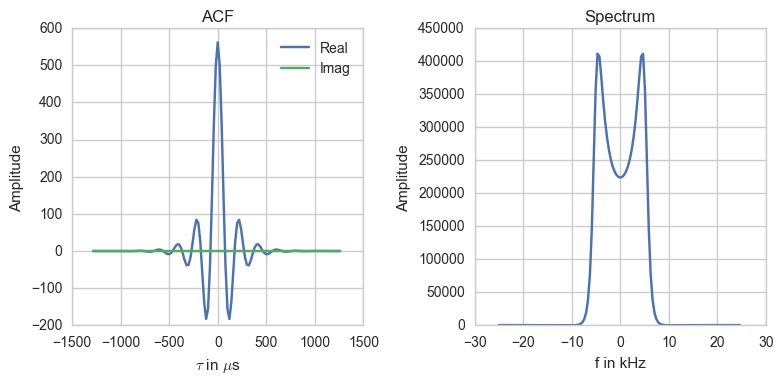

In [26]:
ISpec_ion = ISRSpectrum(centerFrequency = 449e6, nspec=nspec, sampfreq=spfreq,dFlag=True)

species=['O+','e-']
databloc = sp.array([[1.66e10,1e3],[1.66e10,2.5e3]])

f,cur_spec = ISpec_ion.getspecsep(databloc,species)
tau,acf=spect2acf(f,cur_spec)

fig,ax = plt.subplots(1,2,sharey=False, figsize=(8,4),facecolor='w')
rp,imp=ax[0].plot(tau*1e6,acf.real,tau*1e6,acf.imag)
ax[0].legend([rp,imp],['Real','Imag'])
ax[0].set_ylabel('Amplitude')
ax[0].set_title('ACF')
ax[0].set_xlabel(r'$\tau$ in $\mu$s')

ax[1].plot(f*1e-3,cur_spec.real)
ax[1].set_ylabel('Amplitude')
ax[1].set_title('Spectrum')
ax[1].set_xlabel(r'f in kHz')
fig.tight_layout()

## White Noise
A periodogram is applied to complext white Gaussian Noise.

/Users/Bodangles/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


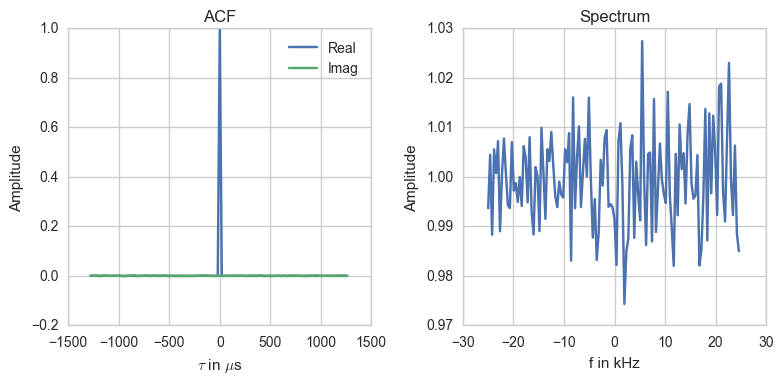

In [27]:
xin =sp.power(2,-.5)*(sp.random.randn(rep1,nspec)+1j*sp.random.randn(rep1,nspec))

Xfft=sp.power(nspec,-.5)*scfft.fftshift(scfft.fft(xin,axis=-1),axes=-1)
Xperiod=sp.power(Xfft.real,2).mean(0) +sp.power(Xfft.imag,2).mean(0)
tau2,acfperiod=spect2acf(f,Xperiod*nspec)

fig2,ax2 = plt.subplots(1,2,sharey=False, figsize=(8,4),facecolor='w')
rp,imp=ax2[0].plot(tau2*1e6,acfperiod.real,tau2*1e6,acfperiod.imag)
ax2[0].legend([rp,imp],['Real','Imag'])
ax2[0].set_ylabel('Amplitude')
ax2[0].set_title('ACF')
ax2[0].set_xlabel(r'$\tau$ in $\mu$s')

ax2[1].plot(f*1e-3,Xperiod.real)
ax2[1].set_ylabel('Amplitude')
ax2[1].set_title('Spectrum')
ax2[1].set_xlabel(r'f in kHz')
fig2.tight_layout()

## Shaped Noise
A periodogram esitmator is applied to noise shaped using the PSD from the IS spectrum derived from before.

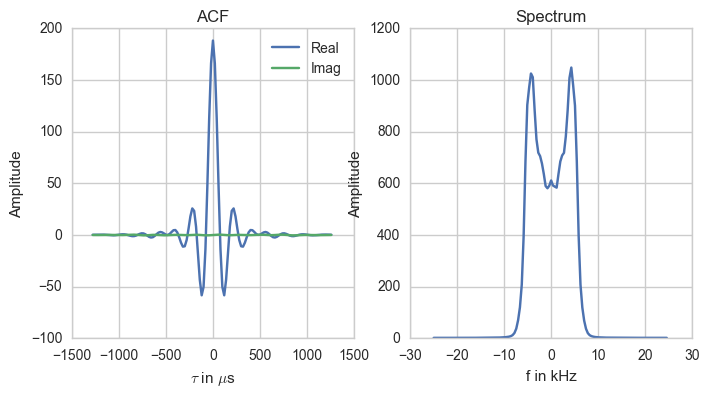

In [33]:
pulse=sp.ones(nspec)
Xdata = MakePulseDataRepLPC(pulse,cur_spec,20,rep1,numtype = sp.complex128)

Xfftd=sp.power(nspec,-.5)*scfft.fftshift(scfft.fft(Xdata,axis=-1),axes=-1)
Xperiodd=sp.power(Xfftd.real,2).mean(0) +sp.power(Xfftd.imag,2).mean(0)
tau3,acfperiodd=spect2acf(f,Xperiodd*nspec)

fig3,ax3 = plt.subplots(1,2,sharey=False, figsize=(8,4),facecolor='w')
rp,imp=ax3[0].plot(tau3*1e6,acfperiodd.real,tau3*1e6,acfperiodd.imag)
ax3[0].legend([rp,imp],['Real','Imag'])
ax3[0].set_ylabel('Amplitude')
ax3[0].set_title('ACF')
ax3[0].set_xlabel(r'$\tau$ in $\mu$s')

ax3[1].plot(f*1e-3,Xperiodd.real)
ax3[1].set_ylabel('Amplitude')
ax3[1].set_title('Spectrum')
ax3[1].set_xlabel(r'f in kHz')
fig2.tight_layout()

## Window Function
The window function for 

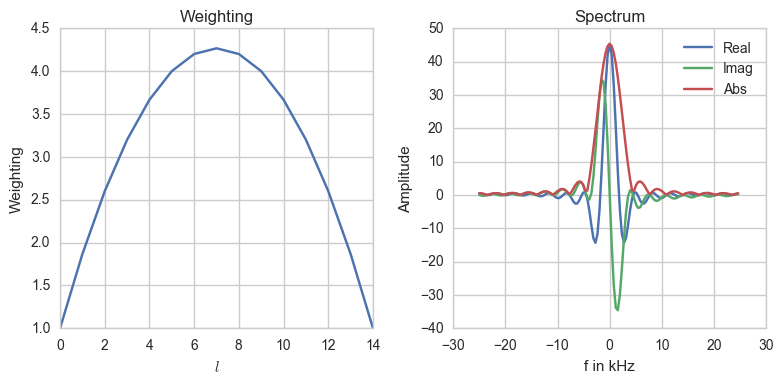

In [39]:
L=15.
v=1
l=sp.arange(L)
W=-l**2/(L*v) + (L-v)*l/L/v+1
wfft=scfft.fftshift(scfft.fft(W,n=nspec))

fig4,ax4 = plt.subplots(1,2,sharey=False, figsize=(8,4),facecolor='w')
ax4[0].plot(l,W)  
ax4[0].set_ylabel('Weighting')
ax4[0].set_title('Weighting')
ax4[0].set_xlabel(r'$l$')
rp,imp,abp=ax4[1].plot(f*1e-3,wfft.real,f*1e-3,wfft.imag,f*1e-3,sp.absolute(wfft))
ax4[1].legend([rp,imp,abp],['Real','Imag','Abs'])
ax4[1].set_ylabel('Amplitude')
ax4[1].set_title('Spectrum')
ax4[1].set_xlabel(r'f in kHz')
fig4.tight_layout()

In [ ]:
lagsDatasum[irngnew,ilag] = lagsData[irng+sumrule[0,ilag]:irng+sumrule[1,ilag]+1,ilag].sum(axis=0)